In [29]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


plt.style.use("bmh")
plt.rcParams["figure.dpi"] = 300
plt.rcParams["lines.linewidth"] = 1

In [30]:
df = pd.read_csv("../data/avocado.csv")
df = df.rename({
    "Date": "date",
    "AveragePrice": "avg_price",
    "Total Volume": "total_volume",
    "4046": "4046_volume",
    "4225": "4225_volume",
    "4770": "4770_volume",
    "Total Bags": "total_bags",
    "Small Bags": "small_bags",
    "Large Bags": "large_bags",
    "XLarge Bags": "xlarge_bags",
    "type": "type",
    "region": "region",
}, axis=1)
df = df[[
    "date",
    "region",
    "avg_price",
    "type",
    "total_volume", "4046_volume", "4225_volume", "4770_volume",
    "total_bags", "small_bags", "large_bags", "xlarge_bags",
]]
df["date"] = pd.to_datetime(df["date"])
df

,date,region,avg_price,type,total_volume,4046_volume,4225_volume,4770_volume,total_bags,small_bags,large_bags,xlarge_bags
0,2015-12-27,Albany,1.33,conventional,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0
1,2015-12-20,Albany,1.35,conventional,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0
2,2015-12-13,Albany,0.93,conventional,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0
3,2015-12-06,Albany,1.08,conventional,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0
4,2015-11-29,Albany,1.28,conventional,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,WestTexNewMexico,1.63,organic,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0
18245,2018-01-28,WestTexNewMexico,1.71,organic,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0
18246,2018-01-21,WestTexNewMexico,1.87,organic,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0
18247,2018-01-14,WestTexNewMexico,1.93,organic,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0


In [28]:
# df.sort_values(["date", "region", "type"]).set_index(["date", "region", "type"])
df.groupby("region")["total_volume"].sum()

region
Albany                 1.606780e+07
Atlanta                8.860512e+07
BaltimoreWashington    1.347139e+08
Boise                  1.441319e+07
Boston                 9.727398e+07
BuffaloRochester       2.296247e+07
California             1.028982e+09
Charlotte              3.555554e+07
Chicago                1.337023e+08
CincinnatiDayton       4.452201e+07
Columbus               2.999336e+07
DallasFtWorth          2.084193e+08
Denver                 1.389025e+08
Detroit                6.342242e+07
GrandRapids            3.021174e+07
GreatLakes             5.896425e+08
HarrisburgScranton     4.180886e+07
HartfordSpringfield    5.067054e+07
Houston                2.031679e+08
Indianapolis           3.026339e+07
Jacksonville           2.879000e+07
LasVegas               5.437691e+07
LosAngeles             5.078965e+08
Louisville             1.609700e+07
MiamiFtLauderdale      9.767322e+07
Midsouth               5.083494e+08
Nashville              3.561209e+07
NewOrleansMobile     

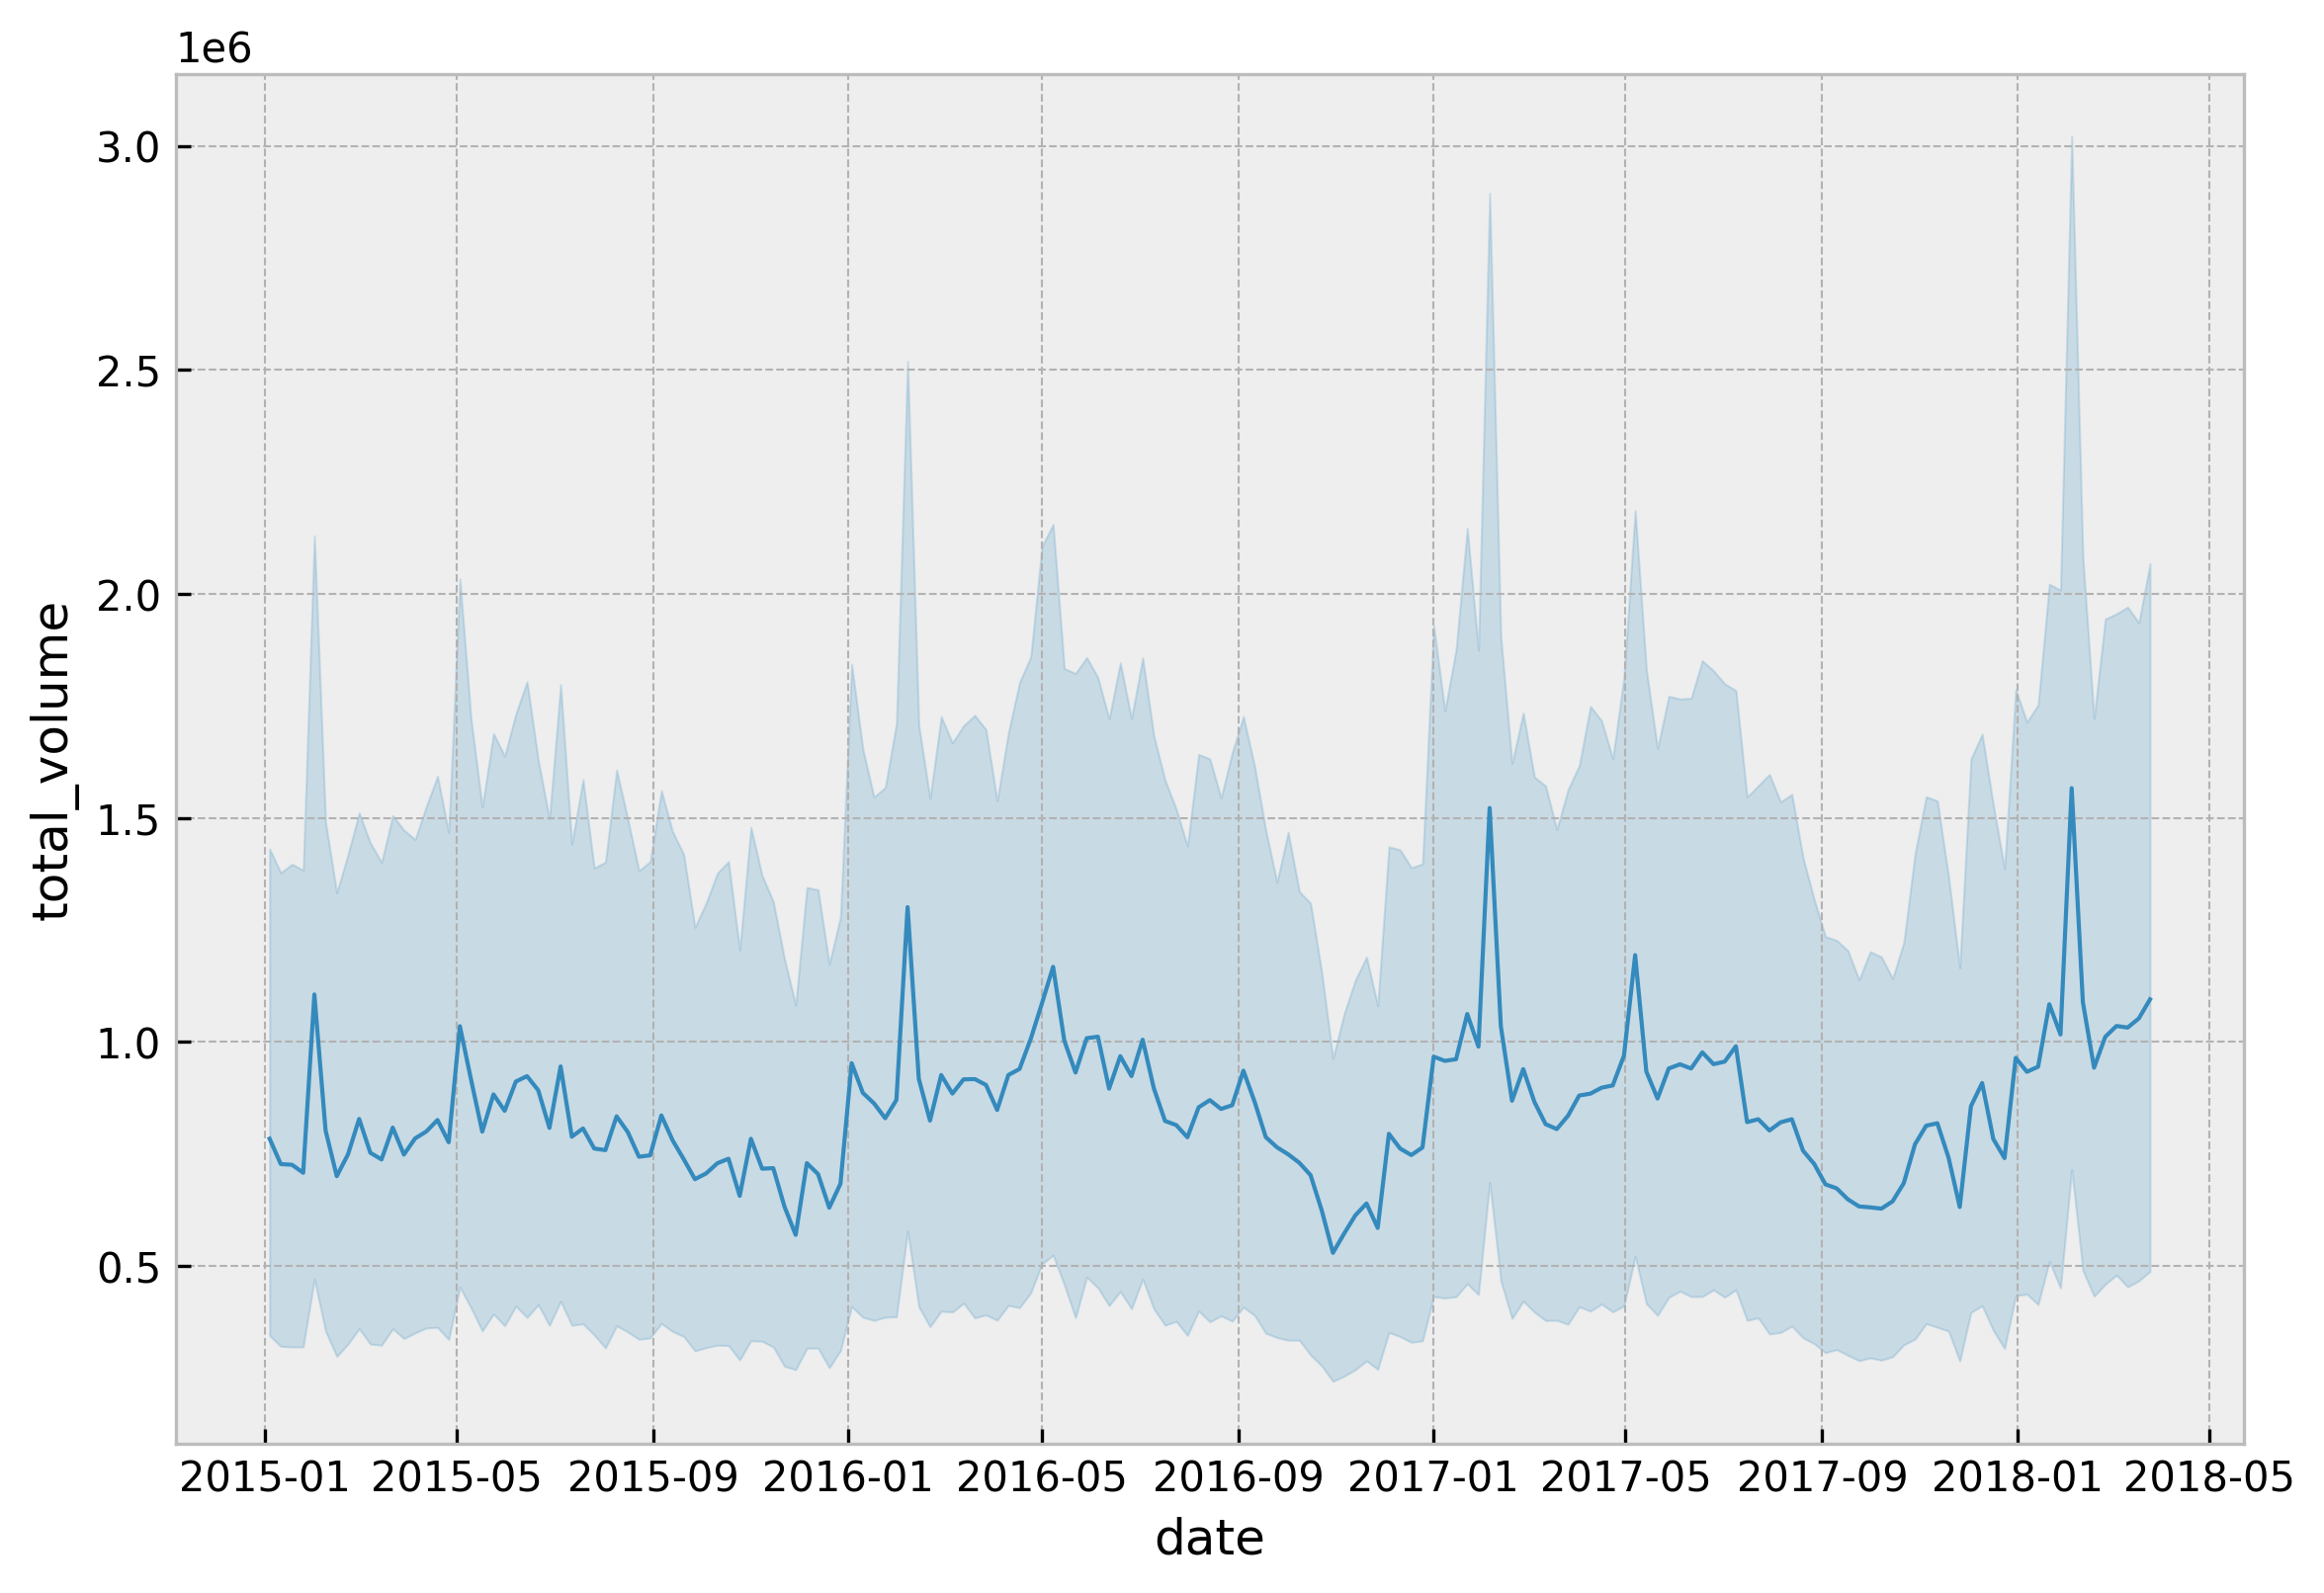

In [31]:
_, ax = plt.subplots(figsize=(9, 6))

sns.lineplot(
    ax=ax,
    data=df,
    x="date",
    y="total_volume",
)

plt.show()

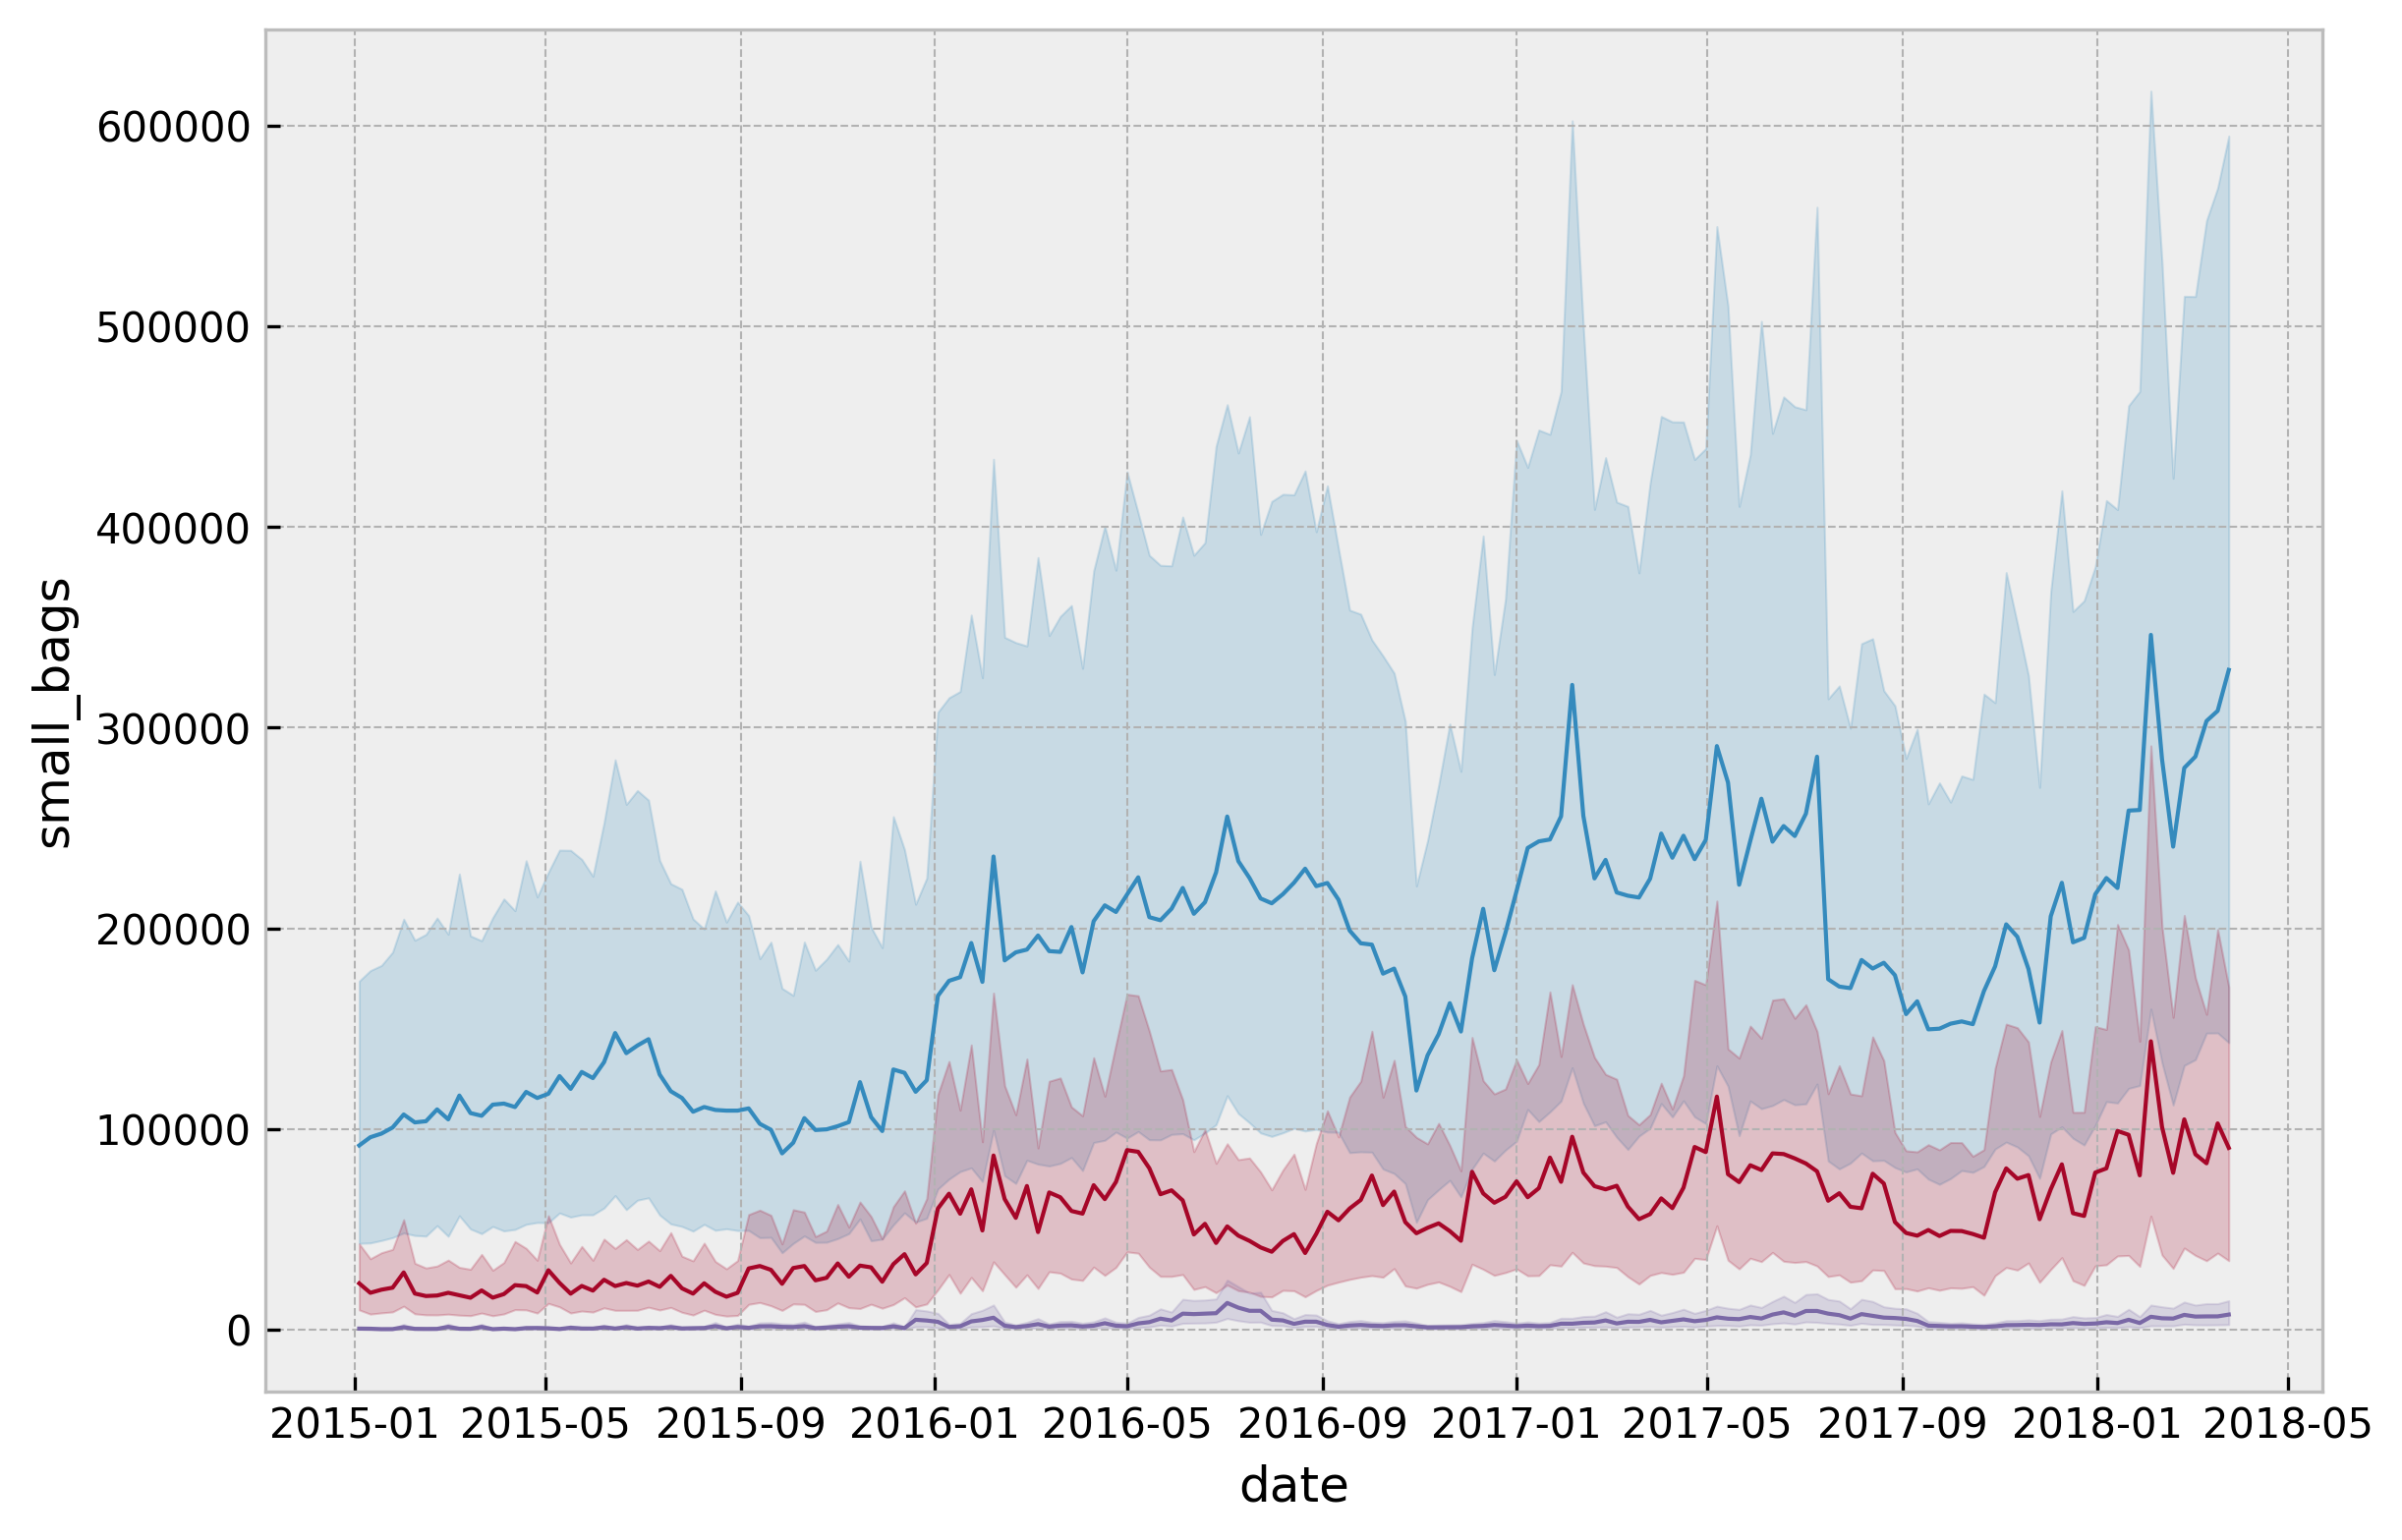

In [34]:
_, ax = plt.subplots(figsize=(9, 6))

sns.lineplot(
    ax=ax,
    data=df,
    x="date",
    y="small_bags",
)
sns.lineplot(
    ax=ax,
    data=df,
    x="date",
    y="large_bags",
)
sns.lineplot(
    ax=ax,
    data=df,
    x="date",
    y="xlarge_bags",
)

plt.show()

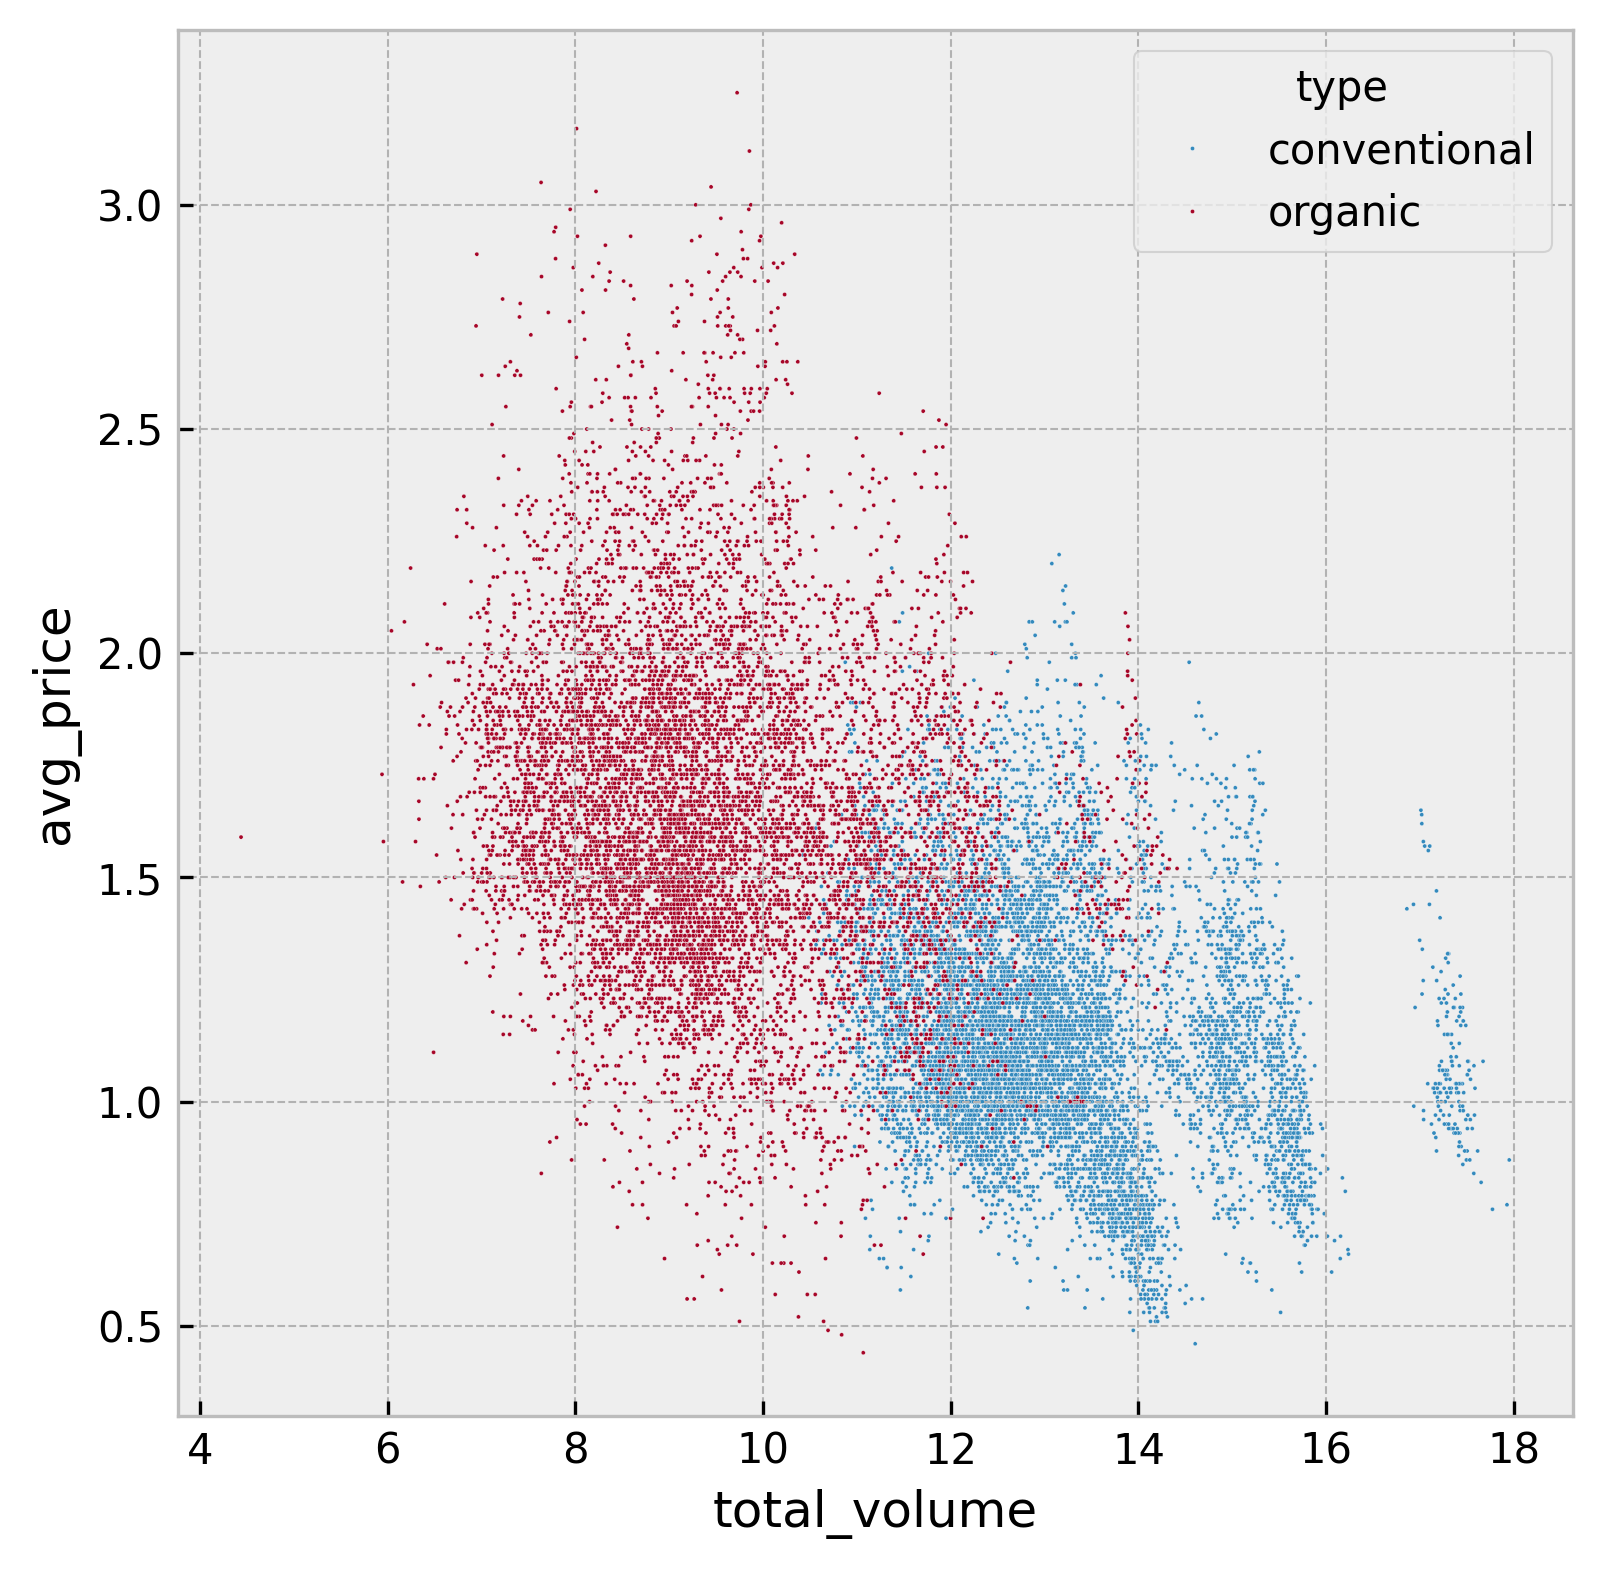

In [20]:
_, ax = plt.subplots(figsize=(6, 6))

sns.scatterplot(
    ax=ax,
    data=df,
    x=np.log(df["total_volume"]),
    y="avg_price",
    hue="type",
    s=1,
)

plt.show()